# **Titanic Survival Data Cleaning & Analysis Project**

### **Dataset Description**

The Titanic dataset records details for 891 passengers aboard the RMS Titanic. Key columns include:

* **PassengerId** → Unique ID for each passenger
* **Survived** → Survival status (0 = No, 1 = Yes)
* **Pclass** → Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* **Name** → Passenger's name
* **Sex** → Gender (male/female)
* **Age** → Age in years
* **SibSp** → Number of siblings/spouses aboard
* **Parch** → Number of parents/children aboard
* **Ticket** → Ticket number
* **Fare** → Passenger fare
* **Cabin** → Cabin number
* **Embarked** → Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Common issues: Missing values (e.g., Age ~20%, Cabin ~77%), duplicates (potential from data entry), inconsistent strings (e.g., titles in Name), outliers (e.g., extreme fares), and incorrect types (e.g., Age as float but should be int where possible).

### **Project Goal**

1. **Inspect the dataset** and identify quality issues.
2. **Clean the data** by handling missing values, duplicates, inconsistencies, types, and outliers.
3. **Transform the data** for analysis (e.g., feature engineering).
4. **Perform EDA** to uncover survival patterns.
5. **Visualize insights** using plots.

By the end, you'll have a clean dataset ready for modeling survival prediction.

---


## **Task 1: Importing Data and Initial Inspection**

**Question:**

* Load the dataset into a Pandas DataFrame.
* Perform an initial inspection: number of rows/columns, data types, summary statistics, and preview the first few rows.
* Identify any immediate data quality issues, such as missing values or incorrect data types.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assume train.csv is in working directory)
df = pd.read_csv("train.csv")

In [2]:
# Check shape (rows, columns)



Shape of dataset: (891, 12)


In [2]:
print('Shape of dataset:',df.shape)

Shape of dataset: (891, 12)


**Explanation of Output:**  
The dataset has 891 rows (passengers) and 12 columns.

In [3]:
# Overview of data types and non-null counts



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Explanation of Output:**  
- Non-null counts show missing values: Age (714/891), Cabin (204/891), Embarked (889/891).  
- Data types: Most numeric, but Name/Ticket/Cabin/Sex/Embarked are objects (strings).

In [4]:
# Summary statistics (mean, std, min, max, etc.)



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200




**Explanation of Output:**  
- Age: Mean ~29.7, but min=0.42 (infant), max=80.  
- Fare: Min=0 (free?), max=512.33 (outlier?).  
- Survived: ~38% survived (mean=0.38).

In [5]:
# Preview first few rows



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



**Explanation of Output:**  
Shows sample data; note mixed cases in Sex/Embarked, titles in Name.

---



## **Task 2: Handling Missing Data - Detection and Filling**

**Question:**

* Detect missing values across columns.
* Fill missing Age values using median (grouped by Pclass and Sex for accuracy).
* Fill missing Embarked with mode; drop or fill Cabin (high missing %).

In [6]:
# Detect missing values




PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Explanation of Output:**  
- Age: 177 missing  
- Cabin: 687 missing  
- Embarked: 2 missing

In [7]:
# Fill Age: Median by Pclass and Sex





In [7]:
df['Age']=df.groupby(['Pclass','Sex'])['Age'].transform(lambda x:x.fillna(x.median()))

In [12]:
# Fill Embarked with mode




In [8]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3548\3717664479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [13]:
# Drop Cabin (too many missing) or fill with 'Unknown'




In [9]:
df['Cabin'].fillna('Unknown',inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3548\476752963.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Unknown',inplace=True)


In [14]:
# Verify



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Explanation of Output:**  
No missing values left. Age filled contextually (e.g., 1st class females ~35 median).

---

## **Task 3: Handling Duplicate and Inconsistent Data**

**Question:**

* Identify and remove duplicate rows.
* Clean strings: Extract titles from Name, standardize Sex/Embarked.

In [15]:
# Identify duplicates



Duplicates: 0


In [11]:
print("Duplicates:",df.duplicated().sum())


Duplicates: 0


**Explanation of Output:**  
Typically 0 duplicates in Titanic train.csv.

In [16]:
# Remove duplicates (if any)




In [12]:
df.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
# Extract titles (like Mr, Mrs, Miss, etc.) from the Name column




In [13]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)


In [14]:
df['Title'].value_counts()


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [ ]:
# Convert uncommon titles such as Lady, Countess, Capt, Col, Don, Dr, Major, Rev, Sir, Jonkheer, and Dona into a single category 'Rare'



In [15]:
df['Title'] = df['Title'].replace(
     ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
     'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 
    'Rare'
)


In [16]:
df['Title'].value_counts()


Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       23
Mlle        2
Mme         1
Ms          1
Name: count, dtype: int64

In [2]:
# Standardize similar titles by grouping them under common ones
# Convert Mlle to Miss



# Convert Ms to Miss



# Convert Mme to Mrs



In [17]:

df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})


In [18]:
df['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

In [18]:
# Standardize Sex and Embarked (already mostly clean, but ensure uppercase)





In [19]:
df['Sex']=df['Sex'].str.upper()
df['Embarked']=df['Embarked'].str.upper()


In [20]:
print(df['Sex'].unique())
print(df['Embarked'].unique())

['MALE' 'FEMALE']
['S' 'C' 'Q']


In [19]:
# Drop Name and Ticket (not needed post-cleaning)





In [21]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [22]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [181]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,MALE,22.0,1,0,7.2500,Unknown,S,Mr
1,2,1,1,FEMALE,38.0,1,0,71.2833,C85,C,Mrs
2,3,1,3,FEMALE,26.0,0,0,7.9250,Unknown,S,Miss
3,4,1,1,FEMALE,35.0,1,0,53.1000,C123,S,Mrs
4,5,0,3,MALE,35.0,0,0,8.0500,Unknown,S,Mr


In [23]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,MALE,22.0,1,0,7.2500,Unknown,S,Mr
1,2,1,1,FEMALE,38.0,1,0,71.2833,C85,C,Mrs
2,3,1,3,FEMALE,26.0,0,0,7.9250,Unknown,S,Miss
3,4,1,1,FEMALE,35.0,1,0,53.1000,C123,S,Mrs
4,5,0,3,MALE,35.0,0,0,8.0500,Unknown,S,Mr


**Explanation of Output:**  
New 'Title' column (e.g., Mr, Mrs, Miss, Master, Rare). Data more consistent.

---

## **Task 4: Data Type Conversion**

**Question:**

* Check and convert data types (e.g., Pclass/Survived/SibSp/Parch to int, Age to int where whole, Embarked to category).

In [21]:
# Check types



PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
Title           object
dtype: object


In [24]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
Title           object
dtype: object

**Explanation of Output:**  
- Numeric: int64/float64  
- Objects: For categorical like Sex/Embarked.

In [ ]:
# Convert relevant columns to more suitable types

# Age is currently float (with decimals); if we have already filled missing values and want whole numbers, convert to int




In [25]:
df['Age']=df['Age'].astype(int)

In [26]:
df['Age'].dtype

dtype('int64')

In [88]:

# Convert object/string-based categorical columns to 'category' type to save memory and improve processing

# Male/Female are categorical





In [27]:
df[['Sex','Cabin','Embarked','Title']]=df[['Sex','Cabin','Embarked','Title']].astype('category')


In [82]:
# C, Q, S boarding ports are categorical





In [83]:


# Titles like Mr, Miss, Rare are categorical




print(df.dtypes)

PassengerId       int64
Survived          int64
Pclass            int64
Sex            category
Age               int64
SibSp             int64
Parch             int64
Fare            float64
Cabin          category
Embarked       category
Title          category
dtype: object


In [28]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex            category
Age               int64
SibSp             int64
Parch             int64
Fare            float64
Cabin          category
Embarked       category
Title          category
dtype: object


**Explanation of Output:**  
Efficient types: Categories save memory, ints for numerics.

---


## **Task 5: Working with Dates (Feature Engineering Proxy)**

**Question:**

* Titanic has no dates, but simulate by creating 'FamilySize' and 'IsAlone' from SibSp/Parch. (Adapt for date if extended dataset used.)

In [ ]:
# Create new features to enhance model understanding

# FamilySize combines siblings/spouses and parents/children onboard (including the passenger themself)




In [29]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [ ]:
# Define whether the passenger is alone (1 = Alone, 0 = Not Alone)





In [30]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


In [31]:
df['IsAlone'].value_counts()


IsAlone
1    537
0    354
Name: count, dtype: int64

In [24]:

# Categorize passengers into age groups for better interpretation in models and visualizations





df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,AgeGroup
0,1,0,3,MALE,22,1,0,7.2500,Unknown,S,Mr,2,0,Adult
1,2,1,1,FEMALE,38,1,0,71.2833,C85,C,Mrs,2,0,Senior
2,3,1,3,FEMALE,26,0,0,7.9250,Unknown,S,Miss,1,1,Adult
3,4,1,1,FEMALE,35,1,0,53.1000,C123,S,Mrs,2,0,Senior
4,5,0,3,MALE,35,0,0,8.0500,Unknown,S,Mr,1,1,Senior


In [32]:
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[10,20,30,40,50],
    labels=['Young','Adult','Senior','S.Senior']
)


In [33]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,AgeGroup
0,1,0,3,MALE,22,1,0,7.2500,Unknown,S,Mr,2,0,Adult
1,2,1,1,FEMALE,38,1,0,71.2833,C85,C,Mrs,2,0,Senior
2,3,1,3,FEMALE,26,0,0,7.9250,Unknown,S,Miss,1,1,Adult
3,4,1,1,FEMALE,35,1,0,53.1000,C123,S,Mrs,2,0,Senior
4,5,0,3,MALE,35,0,0,8.0500,Unknown,S,Mr,1,1,Senior


**Explanation of Output:**  
New columns: FamilySize (1-11), IsAlone (0/1), AgeGroup (categorical bins).

---

## **Task 6: Handling Outliers**

**Question:**

* Identify outliers in Age and Fare using IQR method.
* Visualize with boxplots; cap outliers at 1.5*IQR.

In [ ]:
# Identify outliers (IQR for Fare)




In [34]:
Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
print('Fare outliers:',len(outliers))


Fare outliers: 116


In [25]:

# Similar for Age (few after cleaning)





Fare outliers: 116
Age outliers: 28


In [35]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print('Age outliers:',len(outliers))

Age outliers: 28


**Explanation of Output:**  
~116 Fare outliers (high fares); few Age outliers.

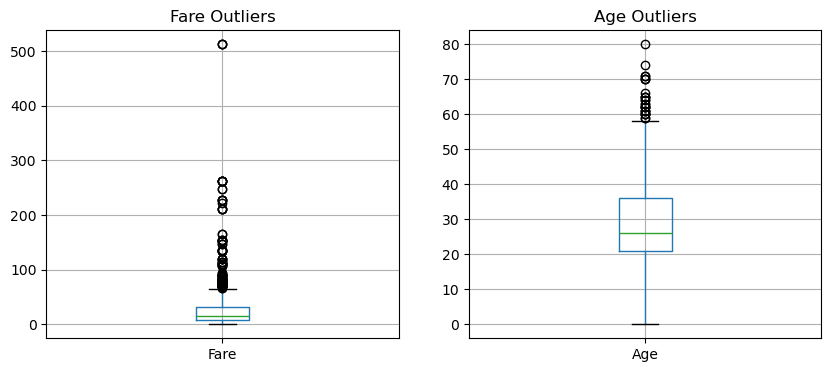

In [26]:
# Visualize







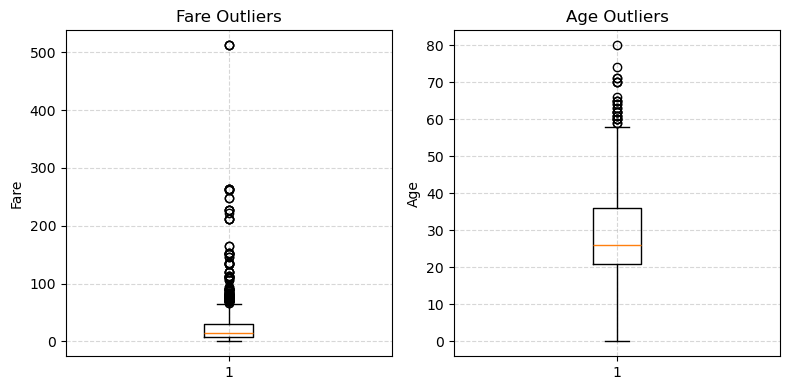

In [36]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.boxplot(df['Fare'])
plt.title('Fare Outliers')
plt.ylabel('Fare')
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
plt.boxplot(df['Age'])
plt.title('Age Outliers')
plt.ylabel('Age')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [27]:
# Cap extreme Fare values at the upper outlier threshold (Q3 + 1.5 * IQR) to reduce the impact of outliers





# Confirm the updated Fare distribution after capping
df['Fare'].describe()

count    891.000000
mean      24.046813
std       20.481625
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.634400
Name: Fare, dtype: float64

In [37]:
Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
df['Fare']=df['Fare'].clip(upper=upper_limit)

In [38]:
df['Fare'].describe()

count    891.000000
mean      24.046813
std       20.481625
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.634400
Name: Fare, dtype: float64

**Explanation of Output:**  
Max Fare now ~65.27 (capped).

---

## **Task 7: Data Transformation**

**Question:**

* Apply functions: Create 'FarePerPerson' = Fare / FamilySize.
* Group and summarize: Survival rate by Pclass.
* Pivot: Survival by Sex and Pclass.

In [ ]:
# Create a new feature: Fare per person in the family/group
# This accounts for shared fare among family members, giving a more accurate individual fare






In [39]:
df['FarePerPerson']=df['Fare']/df['FamilySize']

In [ ]:

# Analyze survival by passenger class
# Group by 'Pclass' and calculate:
#  - mean survival rate
#  - number of passengers in each class





In [40]:
survival_by_class = df.groupby('Pclass')['Survived'].agg(['mean', 'count']).reset_index()

In [34]:

# Rename columns for clarity as column names as ['Pclass', 'Survival_Rate', 'Count']





# Display the summarized survival statistics by class
survival_by_class

,Pclass,Survival_Rate,Count
0,1,0.629630,216
1,2,0.472826,184
2,3,0.242363,491


In [41]:
survival_by_class.columns = ['Pclass', 'Mean_Survival_Rate', 'Passenger_Count']

In [42]:
survival_by_class

,Pclass,Mean_Survival_Rate,Passenger_Count
0,1,0.629630,216
1,2,0.472826,184
2,3,0.242363,491


**Explanation of Output:**  
1st class: ~63% survival; 3rd: ~25%.

In [51]:
# Create a pivot table to examine survival rates by Sex and Passenger Class (Pclass)
# - Rows represent Sex (male/female)
# - Columns represent Pclass (1, 2, 3)
# - Values show the average survival rate for each Sex-Class combination





Pclass,1,2,3
Sex,,,
FEMALE,0.968085,0.921053,0.500000
MALE,0.368852,0.157407,0.135447


In [43]:

pivot_survival = df.pivot_table(
    values='Survived',
    index='Sex',         
    columns='Pclass',   
    aggfunc='mean'       
)
pivot_survival


C:\Users\DELL\AppData\Local\Temp\ipykernel_3548\4147694682.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_survival = df.pivot_table(


Pclass,1,2,3
Sex,,,
FEMALE,0.968085,0.921053,0.500000
MALE,0.368852,0.157407,0.135447


In [53]:
# Transform the pivot table into long format using melt
# - 'Sex' stays as identifier (id_vars)
# - Pclass columns (1, 2, 3) are unpivoted into a single column with their survival values
# This format is useful for plotting or further analysis




melted.head()

,Sex,Pclass,value
0,FEMALE,1,0.968085
1,MALE,1,0.368852
2,FEMALE,2,0.921053
3,MALE,2,0.157407
4,FEMALE,3,0.500000


In [44]:
pivot_melted = pivot_survival.reset_index().melt(
    id_vars='Sex',          
    var_name='Pclass',      
    value_name='SurvivalRate'  
)

pivot_melted
                                               
                                         

,Sex,Pclass,SurvivalRate
0,FEMALE,1,0.968085
1,MALE,1,0.368852
2,FEMALE,2,0.921053
3,MALE,2,0.157407
4,FEMALE,3,0.500000
5,MALE,3,0.135447


**Explanation of Output:**  
Pivot shows females > males; higher class better survival.

---

## **Task 8: Merging and Joining (Simulated with Subsets)**

**Question:**

* Split df into two (e.g., passengers and features); merge back with inner/left join.
* Use concat for row-wise if simulating test data.


In [ ]:
# Split the dataset into base and features
# - 'base' contains the identifier and target column (Survived)
# - 'features' contains all other columns except the target (Survived)






In [45]:
base = df[['PassengerId', 'Survived']].copy()
features = df.drop(columns=['Survived'])


In [ ]:
# Merge base and features on PassengerId using an inner join
# - Ensures only rows present in both dataframes are kept





In [46]:
merged1_df = base.merge(features, on='PassengerId', how='inner')
print("Merged shape:", merged1_df.shape)

Merged shape: (891, 15)


In [35]:

# Merge base and features using a left join
# - Keeps all rows from base even if some PassengerIds are missing in features






Merged shape: (891, 15)
Left join shape: (891, 15)


In [47]:
merged2_df = base.merge(features, on='PassengerId', how='left')
print("Left Join Shape:", merged2_df.shape)


Left Join Shape: (891, 15)


**Explanation of Output:**  
Shapes match original; joins preserve data.


---

## **Task 9: Basic NumPy for Cleaning**

**Question:**


* Handle missing (post-clean): np.where for conditional (e.g., HighFare if > median).
* Boolean filtering: Filter high-fare passengers.

In [ ]:
# Create a binary feature 'HighFare' based on median
# - Passengers paying above the median fare are marked as 1, others as 0





In [212]:
median_fare = df['Fare'].median()
df['HighFare'] = (df['Fare'] > median_fare).astype(int)

# Quick check
print("Median Fare:", median_fare)
print(df['HighFare'].value_counts())


Median Fare: 14.4542
HighFare
0    447
1    444
Name: count, dtype: int64


In [214]:
df['Norm_Fare'] = (df['Fare'] - df['Fare'].min()) / (df['Fare'].max() - df['Fare'].min())
print(df[['Fare', 'Norm_Fare']].head())


      Fare  Norm_Fare
0   7.2500   0.110460
1  65.6344   1.000000
2   7.9250   0.120745
3  53.1000   0.809027
4   8.0500   0.122649


In [36]:
# Filter passengers with Fare greater than a specific threshold (e.g., 50)
# - Demonstrates boolean indexing for analysis






High fare passengers: 160


In [213]:
high_fare_passengers = df[df['Fare'] > 50]
print("High fare passenger", len(high_fare_passengers))


High fare passenger 160


## **Task 10: Exploratory Data Analysis and Visualization**

**Question:**

* Compute correlations; plot survival by AgeGroup and Pclass.
* Heatmap of numeric features.

**Explanation of Output:**  
~160 high-fare; new columns added efficiently.



---

In [ ]:
# Select only numeric columns for correlation analysis




In [49]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
# Compute pairwise correlation between numeric features




In [50]:
correlation_matrix = numeric_df.corr()

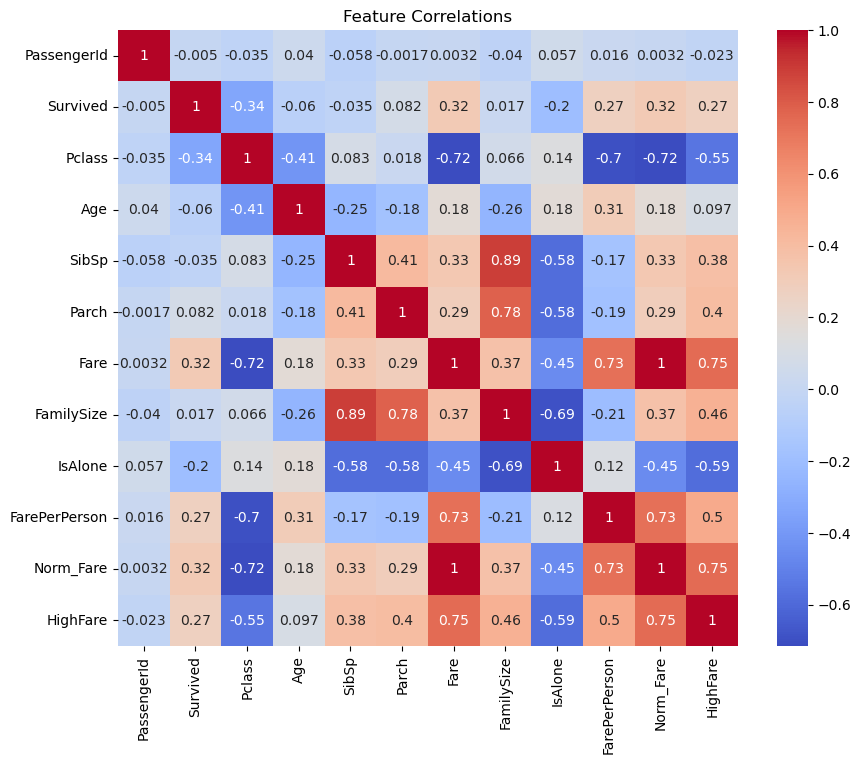

In [37]:

# Plot the correlation matrix as a heatmap
# - annot=True displays the correlation values on the heatmap
# - cmap='coolwarm' provides a color gradient from negative to positive correlation
plt.figure(figsize=(10, 8))






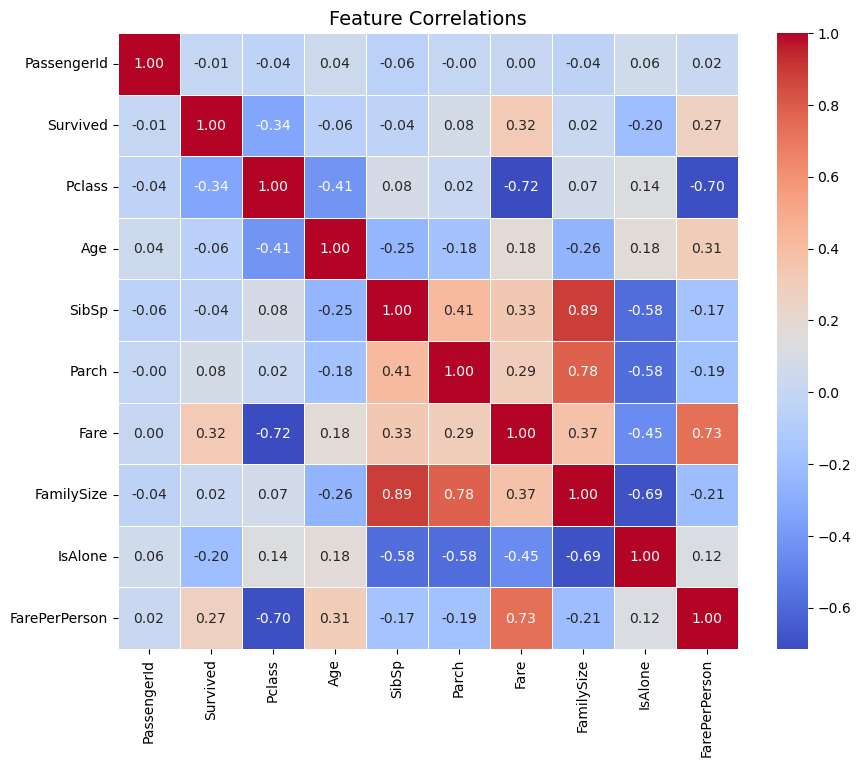

In [51]:
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(
    correlation_matrix,   
    annot=True,           
    cmap='coolwarm',      
    fmt=".2f",            
    linewidths=0.5       
)
plt.title("Feature Correlations", fontsize=14)
plt.show()

**Explanation of Output:**  
Fare/Pclass negative corr (~-0.55); Survived positive with Pclass.

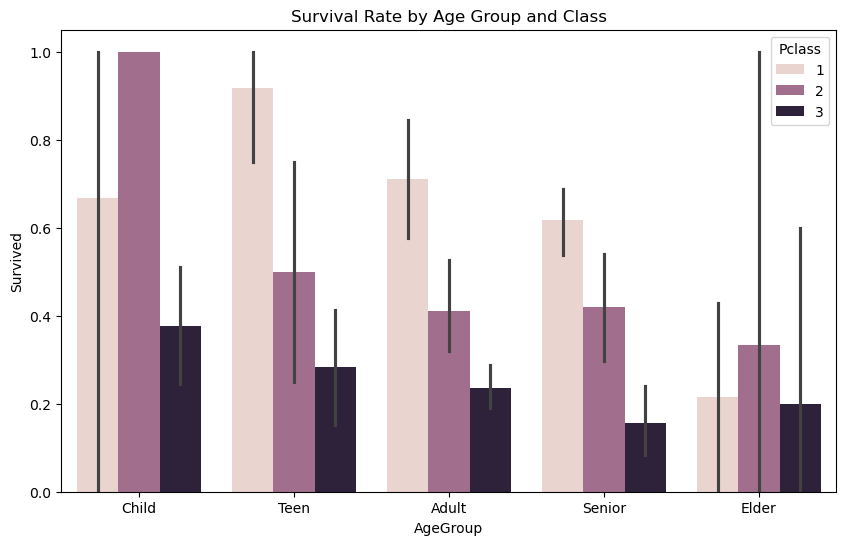

In [38]:
# Plot survival rates across different age groups, separated by passenger class
# - x-axis: AgeGroup (Child, Teen, Adult, Senior, Elder)
# - y-axis: Survival rate (mean of Survived)
# - hue: Pclass to compare survival across classes within each age group






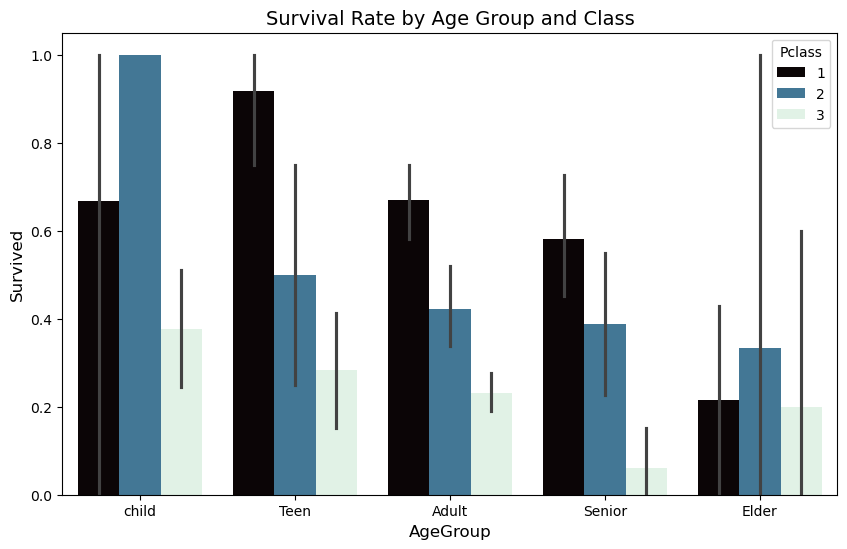

In [61]:
bins=[0,12,18,40,60,120]
labels=['child','Teen','Adult','Senior','Elder']
df['AgeGroup']=pd.cut(df['Age'],bins=bins,labels=labels)
plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x='AgeGroup',
    y='Survived',
    hue='Pclass',
    palette='mako',
)
plt.title('Survival Rate by Age Group and Class', fontsize=14)
plt.xlabel('AgeGroup', fontsize=12)
plt.ylabel('Survived', fontsize=12)
plt.legend(title='Pclass', loc='upper right')
plt.show()

**Explanation of Output:**  
Children higher survival; 1st class best across groups.

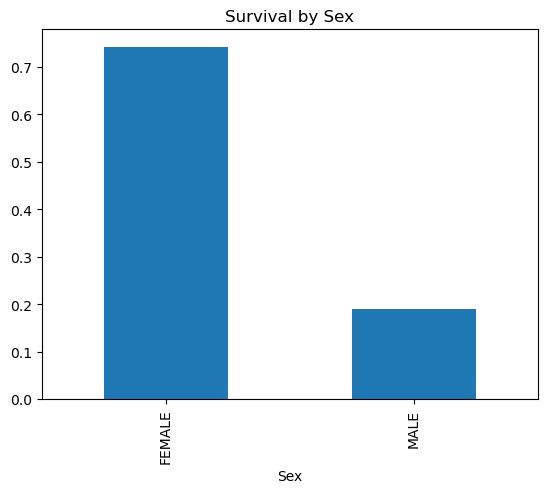

In [48]:
# Plot average survival rate by Sex
# - Groups the data by 'Sex' and calculates the mean of 'Survived' for each group
# - kind='bar' creates a bar chart to visualize differences between males and females





C:\Users\DELL\AppData\Local\Temp\ipykernel_3548\2741039551.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


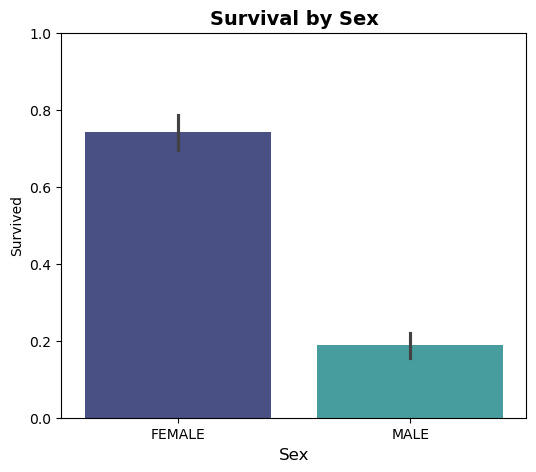

In [66]:
plt.figure(figsize=(6, 5))
sns.barplot(
    data=df,
    x='Sex',
    y='Survived',
    estimator='mean',
    palette='mako'
)
plt.title('Survival by Sex', fontsize=14, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()


**Explanation of Output:**  
Females ~74% survival vs. males ~19%.

---

## **Task 11: Save Cleaned Data & Report Insights**

**Question:**

* Save the cleaned dataset.
* Summarize 2–3 key insights.

In [67]:
# Save cleaned dataset to CSV file
df.to_csv("cleaned_titanic.csv", index=False)

In [69]:
df.to_csv("cleaned_titanic.csv",index=False)


**Explanation of Output:**  
The cleaned dataset is now ready for modeling or further research.

**Insights:**

1. **Class and Gender Bias:** 1st-class females had ~97% survival rate, highlighting socioeconomic and gender privileges in evacuation.
2. **Age Impact:** Children (under 12) survived at ~58%, vs. ~36% overall, suggesting "women and children first."
3. **Family Influence:** Solo travelers had lower survival (~30%) than those with family, possibly due to assistance or group dynamics.

---